## Data quality check / cleaning / preparation 

### Data quality check
*By Lila Wells*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [31]:
# Loading relevant libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import statsmodels.formula.api as sm


# Loading the data
data = pd.read_csv("dataset_diabetes/diabetic_data.csv")
ID = pd.read_csv('dataset_diabetes/IDs_mapping.csv')

In [32]:
#...Distribution of continuous variables...#

# num_lab_procedures (continuous variable)
data.num_lab_procedures.isnull().sum() # No missing values
data.num_lab_procedures.describe() # count = 101766.000000, mean = 43.095641, std = 19.674362, min = 1.000000, 25% = 31.000000, 50% = 44.000000, 75% = 57.000000, max = 132.000000

# num_procedures (continuous variable)
data.num_procedures.isnull().sum() # No missing values
data.num_procedures.describe() # count = 101766.000000, mean = 1.339730, std = 1.705807, min = 0.000000, 25% = 0.000000, 50% = 1.000000, 75% = 2.000000, max = 6.000000

# num_medications (continuous variable)
data.num_medications.isnull().sum() # No missing values
data.num_procedures.describe() # count = 101766.000000, mean = 1.339730, std = 1.705807, min = 0.000000, 25% = 0.000000, 50% = 1.000000, 75% = 2.000000, max = 6.000000

# number_outpatient (continuous variable)
data.number_outpatient.isnull().sum() # No missing values
data.number_outpatient.describe() # count = 101766.000000, mean = 0.369357, std = 1.267265, min = 0.000000, 25% = 0.000000, 50% = 0.000000, 75% = 0.000000, max = 42.000000

# number_emergency (continuous variable)
data.number_emergency.isnull().sum() # No missing values
data.number_emergency.describe() # count = 101766.000000, mean = 0.197836, std = 0.930472, min = 0.000000, 25% = 0.000000, 50% = 0.000000, 75% = 0.000000, max = 76.000000

# number_inpatient (continous variable)
data.number_inpatient.isnull().sum() # No missing values
data.number_inpatient.describe() # count = 101766.000000, mean = 0.635566, std = 1.262863, min = 0.000000, 25% = 0.000000, 50% = 0.000000, 75% = 1.000000, max = 21.000000

# number_diagnoses (continuous variable)
data.number_diagnoses.isnull().sum() # No missing values
data.number_diagnoses.describe() # count = 101766.000000, mean = 7.422607, std = 1.933600, min = 1.000000, 25% = 6.000000, 50% = 8.000000, 75% = 9.000000, max = 16.000000

# age (continuous variable)
data.age.isnull().sum() # No missing values
data.age.describe() # count = 101766, unique = 10, top = [70-80), freq = 26068

# time_in_hospital (continuous variable)
data.time_in_hospital.isnull().sum() # No missing values
data.time_in_hospital.describe() # count = 101766, mean = 4.395987, std = 2.985108, min = 1.000000, 25% = 2.000000, 50% = 4.000000, 75% = 6.000000, max = 14.000000

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

In [33]:
#...Distribution of categorical variables...#

# Change (categorical variable)
data.change.value_counts() # No : 54755, Ch : 47011
data.change.isnull().sum() # No missing values 

# diabetesMed (categorical variable)
data.diabetesMed.value_counts() # Yes : 78363, No : 23403
data.diabetesMed.isnull().sum() # No missing values 

# diag_1 (categorical_variable)
data.diag_1.value_counts() # 717 levels here 
data.diag_1.isnull().sum() # No missing values 

# diag_2 (categorical variable)
data.diag_2.value_counts() # 749 levels here
data.diag_2.isnull().sum() # No missing values 

# admission_source_id (categorical variable)
data.admission_source_id.value_counts() # 17 levels here
data.admission_source_id.isnull().sum() # No missing values 

# discharge_disposition_id (categorical variable)
data.discharge_disposition_id.value_counts() # 26 levels here
data.discharge_disposition_id.isnull().sum() # No missing values 

# admission_type_id (categorical variable)
data.admission_type_id.value_counts() # {1 : 53990, 3 : 18869, 2 : 18480, 6 : 5291, 5 : 4785, 8 : 320, 7 : 21, 4 : 10}
data.admission_type_id.isnull().sum() # No missing values 

0

/var/folders/25/jjvj1r3d1lj4q97f1twwhgkm0000gn/T/ipykernel_6542/3545912699.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr())


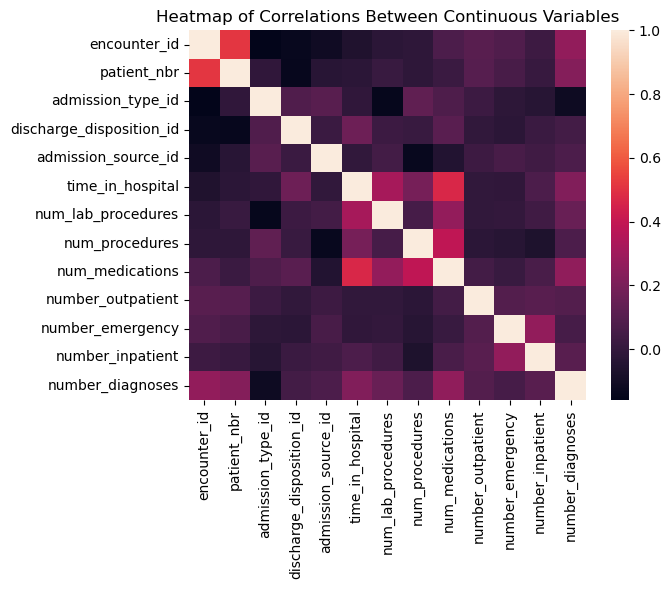

In [34]:
#...Association of the response with the predictors...#

# Creating a heatmap to visualize the association between the response and predictors
sns.heatmap(data=data.corr())
plt.title('Heatmap of Correlations Between Continuous Variables')
plt.savefig("heatmap_continuous.png", dpi=300)


### Data Cleaning
*By Anastasia Wei*

From the data quality check we realized that:

1. Two predictors, `weight`, and `medical specialty` have more than 50% missing values. We don't think it's reasonable to input the values as we do not know the underlying distributions of these two variables. Therefore, we decided to remove these two variables.

2. The predictor `race` is missing 2% of its values, so we imputed it by randomly sampling the distribution of race in the remaining observations. 

The code below implements the above cleaning.

In [35]:
######-----------Changing the IDs into a three column format------------#########
IDs = pd.DataFrame(index = range(63), columns = ['ID_types', 'ID_num', 'Description'])

IDs.loc[:8, 'ID_types'] = ['admission_type_id'] * 9
IDs.loc[:8, 'ID_num'] = ID.loc[:8,'admission_type_id'].values
IDs.loc[:8, 'Description'] = ID.loc[:8,'description'].values

IDs.loc[8:38, 'ID_types'] = ['discharge_disposition_id'] * 31
IDs.loc[8:38, 'ID_num'] = ID.loc[10:40,'admission_type_id'].values
IDs.loc[8:38, 'Description'] = ID.loc[10:40,'description'].values

IDs.loc[38:, 'ID_types'] = ['admission_source_id'] * 25
IDs.loc[38:, 'ID_num'] = ID.loc[42:,'admission_type_id'].values
IDs.loc[38:, 'Description'] = ID.loc[42:,'description'].values

# Saving the cleaned IDs to a new csv file
IDs.to_csv('IDs_clean.csv')

######-----------Dropping the columns w/ more than 50% values missing------------#########
data.drop(['weight','medical_specialty'], axis = 1, inplace = True)

######-----------Removing duplicate records for the same patient------------#########
print('Length before removing Duplicates:', len(data))
data.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(data))

######-----------Changing readmission to two levels instead of three------------#########

# Checking the values of the readmitted column and changing it to two levels
# Readmitted is defined here as '1' if the patient returns to hospital within 30 days
data.readmitted.value_counts()
data['readmitted'] = data['readmitted'].apply(lambda x: 0 if x == 'NO' or x == '>30'
                                              else 1)

######-----------Imputing Missing Values in Race by drawing randomly from the race in the observations------------#########

# Checking the value counts of race and where values are missing 
races = data['race'].loc[data['race'] != '?'].values
data['race'].value_counts()

# Applying a lambda function to the race column to impute missing values 
data['race'] = data['race'].apply(lambda x: random.choice(races) if x == '?' else x)
data['race'].value_counts()

# Re-indexing
data.index = np.arange(0,len(data))


Length before removing Duplicates: 101766
Length after removing Duplicates: 71518


### Data preparation
*By Anastasia Wei*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Changed each age interval to the middle of the interval
2. Used domain knowledge about the diagnosis mapping to futher bin the `diag1`, `diag2`, and `diag3` predictors. 
3. Performed mapping on variables `admission_type_id`, `admission_source_id`, and `discharge_disposition_id.` Changing each from 8, 30, 25 distinct levels to 4, 6, and 8 distinct levels.
4. Created a new variable `num_of_changes` to aggregate the number of changes in medications per patient.
5. Changed `readmission`, the response variable, from 3 levels (No, >30, <30) to 2 levels (0,1) for readmitted and admitted
6. Split the data into train set and test sets. We randomly sampled 80% of the data to be the train set and used the rest as the test data set.

In [36]:
######-----------Replacing the age range with the middle of the interval------------#########
replaceDict = {'[0-10)' : 5,'[10-20)' : 15, '[20-30)' : 25, 
               '[30-40)' : 35,'[40-50)' : 45,'[50-60)' : 55,
               '[60-70)' : 65,'[70-80)' : 75,'[80-90)' : 85,
               '[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : replaceDict[x])
print(data['age'].head())

######-----------Using domain knowledge on diag_1, diag_2, and diag_3 to bin the diagnoses------------#########

# Defining a helper function to determine if a number is a float
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

# Defining a function to bin the diagnoses columns
def diag_transform(x):
    if str(x)[0] == 'V' or str(x)[0] == 'E':
        return 'other'
    elif isfloat(x):
        if int(float(x)) in range(390, 460) or int(float(x)) == 785:
            return 'circulatory'
        elif int(float(x)) in range(460, 520) or int(float(x)) == 786:
            return 'respiratory'
        elif int(float(x)) in range(520, 580) or int(float(x)) == 787:
            return 'digestive'
        elif int(float(x)) == 250:
            return'diabetes'
        elif int(float(x)) in range(800, 1000):
            return 'injury'
        elif int(float(x)) in range(710, 740):
            return 'musculoskeletal'
        elif int(float(x)) in range(580, 630) or int(float(x)) == 788:
            return 'genitourinary'
        elif int(float(x)) in range(140, 240):
            return 'neoplasms'
        elif int(float(x)) in range(630, 680):
            return 'pregnecy'
        else:
            return 'other'
    else:
        return 'other'

# Applying the functions to the appropriate columns in the dataframe 
data['diag_1'] = data['diag_1'].apply(diag_transform)
data['diag_2'] = data['diag_2'].apply(diag_transform)
data['diag_3'] = data['diag_3'].apply(diag_transform)

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


In [37]:
######-----------Using domain knowledge to bin admission_type_id, discharge_disposition_id, admission_source_id------------#########

# Changing the datatypes of the appropriate columns 
data['admission_type_id'] = data['admission_type_id'].astype('int')
data['admission_source_id'] = data['admission_source_id'].astype('int')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('int')

# Defining helper functions to transform the data 
def ad_type_transform(x):
    if x in [2,7]:
        return 1
    elif x in [6,8]:
        return 5
    else:
        return x
    
def ad_source_transform(x):
    if x in [2,3]:
        return 1
    elif x in [5,6,10,22,25]:
        return 4
    elif x in [15,17,20,21]:
        return 9
    elif x in [13,14]:
        return 11
    else:
        return x
    
def discharge_transform(x):
    if x in [6, 8, 9, 13]:
        return 1
    elif x in [3, 4, 5, 14, 22, 23, 24]:
        return 2
    elif x in [12, 15, 16, 17]:
        return 10
    elif x in [19, 20, 21]:
        return 11
    elif x in [25, 26]:
        return 18
    elif x in [13,14,19,20,21]:
        return 11
    else:
        return x

    
# Applying the helper functions to the appropriate columns
data['admission_type_id'] = data['admission_type_id'].apply(ad_type_transform)
data['admission_source_id'] = data['admission_source_id'].apply(ad_source_transform)
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(discharge_transform)

In [38]:
######-----Creating number of changes variable (number of 'ups' and 'downs' in medication)-------#########

# Creating a list of the drugs in the dataset
druglist = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride','acetohexamide', 'glipizide', 'glyburide', 
            'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 
            'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 
            'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone',
            'metformin-pioglitazone']

# Defining a helper function to help create this variable 
num_of_changes = []
for i in tqdm(range(len(data))) :
    changeCount = 0
    for col in druglist : 
        if data.iloc[i][col] in ['Down', 'Up'] :
            changeCount += 1
    num_of_changes.append(changeCount)
    
# Creating the variable in the dataset
data['num_of_changes'] = num_of_changes

100%|████████████████████████████████████| 71518/71518 [02:40<00:00, 445.89it/s]


In [39]:
######-----Saving the cleaned data as a CSV-------#########
data.to_csv('diabetes_cleaned.csv')

######-----Creating test and train datasets-------#########

# Using 80% for train, 20% for test
print(len(data))
print(len(data)*0.2)

# Creating the test data
pop = list(np.arange(0,71518))
test_loc = random.sample(pop, k = 14304)
test = data.iloc[test_loc]
test.index = np.arange(0, 14304)

# Creating the train data 
train_loc = list(set(pop) - set(test_loc))
train = data.iloc[train_loc]
train.index = np.arange(0, 57214)

# Saving both dfs as CSVs
test.to_csv('test.csv')
train.to_csv('train.csv')

71518
14303.6


#### Addressing Response Imbalance (For Base Model Development) With Undersampling
*By Lila Wells and Kaitlyn Hung*

To address the response imbalance (`readmitted`: 90% `0`, 10% `1`), we first attempted undersampling by reducing the number of negative (`0`) datapoints in our training data (so that our resulting training data would have a 50-50 split of both positive and negative datapoints). 

In [40]:
# Loading datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Drop random column
train = train.drop(columns = 'Unnamed: 0')
test = test.drop(columns = 'Unnamed: 0')

######-----Creating a train dataset using undersampling-------#########

# Filtering the dataset so that it only has not-readmitted vals
no_readmit = train[train['readmitted'] == 0]
readmit = train[train['readmitted'] == 1]

# Taking a random sample from the no_reamit df 
import random

n = 5044 # To get a 50-50 split, we need a sample of 5041
no_readmit1 = no_readmit.sample(n)

no_readmit.shape # (52173, 48)
readmit.shape # (5041, 48)
no_readmit1.shape # (5041, 48)

# Merging the no_readmit1 and readmit dfs to get a train1 df
merged_df = pd.concat([no_readmit1, readmit])
merged_df.shape

# Randomly shuffling the resulting df
train1 = merged_df.sample(frac=1)

# Creating a copy of the dataframe for undersampling 
train_undersampling = train1.copy()
train_undersampling.readmitted.value_counts()

0    5044
1    5011
Name: readmitted, dtype: int64

#### Addressing Response Imbalance (For Model Optimization) With SMOTENC

*By Amy Wang*

We solve the problem of an unevenly distributed response variable (`readmitted`: 90% `0`, 10% `1`) by synthetically generating data representing positive (`1`) datapoints within our train data with SMOTENC, to have equal proportions of positive and negative datapoints. We use this training dataset in efforts to optimize the preliminary models.

In [41]:
### Install the SMOTENC package

# steps to install imblean in conda environment
# pip install imblearn
# conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import SMOTENC

In [42]:
# Read in the cleaned training and test data
train = pd.read_csv('train.csv').iloc[:, 1:]
test = pd.read_csv('test.csv').iloc[:, 1:]


# Split the training data into predictors (X_train) and response (y_train)
X_train = train.drop(columns="readmitted")
y_train = train.loc[:, "readmitted"]

# Identify the datatype of the predictors, and get the name of all object datatype column names
X_train_types = X_train.dtypes.to_frame().rename(columns={0: "type"})
object_vars = list(X_train_types.loc[X_train_types.type == "object", :].index)
# Add numerical predictors that we treat as categorical variables
object_vars = object_vars + ["age", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital", "num_of_changes"]

# Get the indices of all categorical variables
object_var_indices = []
for i in range(0, len(X_train.columns)):
    if X_train.columns[i] in object_vars:
        object_var_indices.append(i)


# Initialize SMOTENC object
smote_nc = SMOTENC(categorical_features=object_var_indices, random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)
# Combine the response variable back in with the predictors
X_resampled.loc[:, "readmitted"] = y_resampled
train1 = X_resampled.copy()

In [43]:
# Finding the value counts of the train data after SMOTENC
train1.readmitted.value_counts()

0    52203
1    52203
Name: readmitted, dtype: int64

#### Helper function to create dummy variables of binned variables for model optimization
*By Amy Wang*

We separate certain categorical variables when optimizing the model, so that each binned value is its own predictor. This helper function creates the `train1_dummy` and `test_dummy` datasets with the dummy variables.

The `vars` variable stores lists of the values of each variable, for simplified formulation of logistic models containing these variables.

In [44]:
dummy_preds = ["age", "time_in_hospital", "admission_type_id", "discharge_disposition_id", "admission_source_id", "diag_1", "diag_2"]
train1_dummy = train1.copy()
test_dummy = test.copy()
vars = []

for pred in dummy_preds:
    dummy_train = pd.get_dummies(train1.loc[:, pred])
    dummy_train.columns = [pred + str(x) for x in dummy_train.columns]
    train1_dummy = pd.concat([train1_dummy, dummy_train], axis=1)
    vars.append(list(dummy_train.columns))
    
    dummy_test = pd.get_dummies(test.loc[:, pred])
    dummy_test.columns = [pred + str(x) for x in dummy_test.columns]
    test_dummy = pd.concat([test_dummy, dummy_test], axis=1)

## Exploratory Data Analysis
*By Anastasia Wei, Lila Wells, Kaitlyn Hung, and Amy Wang*

Text(0.5, 1.0, 'Heatmap of Correlations Between Continuous Variables')

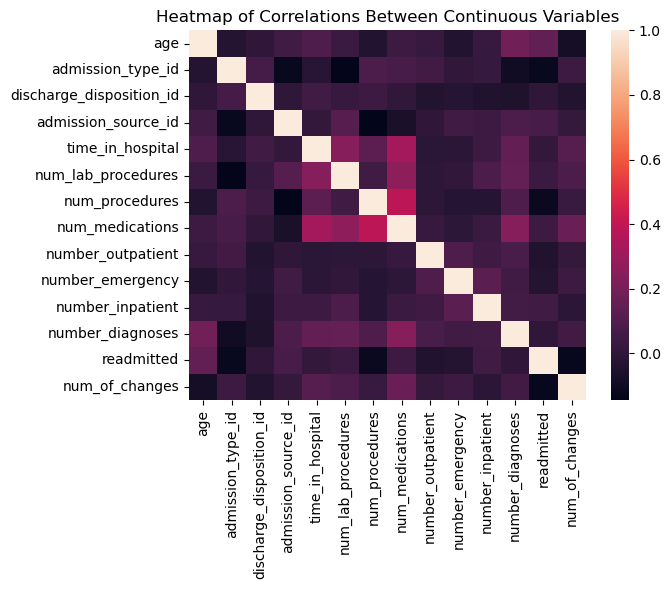

In [45]:
# --- Heatmap of the correlation values between continuous variables in the train1 df -- #

# Extracting the continuous variables from the train1 df
continuous_vars = train1.loc[:, ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 
       'number_diagnoses', 'readmitted',
       'num_of_changes']]

continuous_vars = continuous_vars.reset_index(drop=True)

# Creating the heatmap
sns.heatmap(data=continuous_vars.corr())
plt.title('Heatmap of Correlations Between Continuous Variables')

Text(0.5, 0, 'Age')

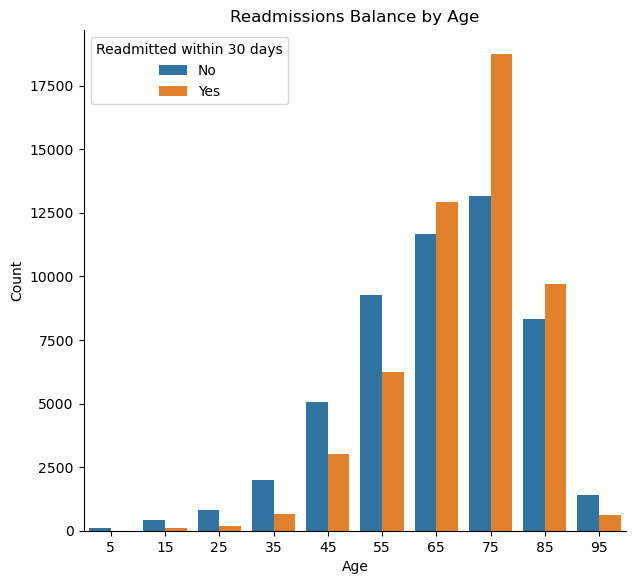

In [46]:
# --- Figuring out the distribution of response variable (readmitted) with age -- #

b = train1.age.unique()
b.sort()
b_sort = np.array(b).tolist()

# Creating the plot 
ageplt = sns.countplot(x = 'age', hue = 'readmitted', data = train1, order = b_sort) 

# Formatting the plot
sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'Time Spent in Hospital During Initial Stay')

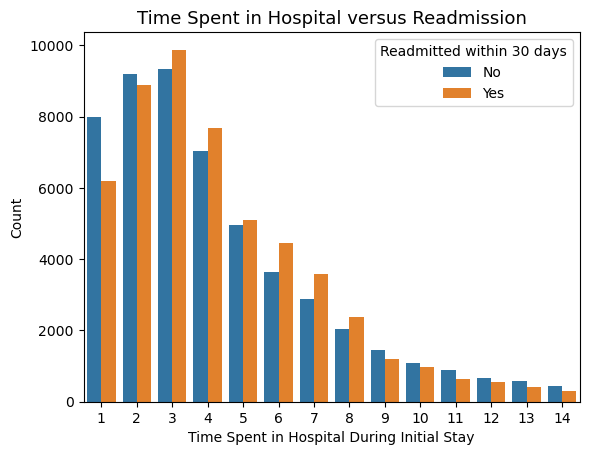

In [47]:
# --- Figuring out the distribution of response variable (readmitted) with time spent in hospital -- #

c = train1.time_in_hospital.unique()
c.sort()
c_sort = np.array(c).tolist()

# Creating the plot 
timeplt = sns.countplot(x = 'time_in_hospital', hue = "readmitted", data = train1, order = c_sort) 

# Formatting the plot 
plt.title('Time Spent in Hospital versus Readmission', size = 13)
timeplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.ylabel('Count')
plt.xlabel('Time Spent in Hospital During Initial Stay')

Text(0.5, 0, 'Number of Diagnoses')

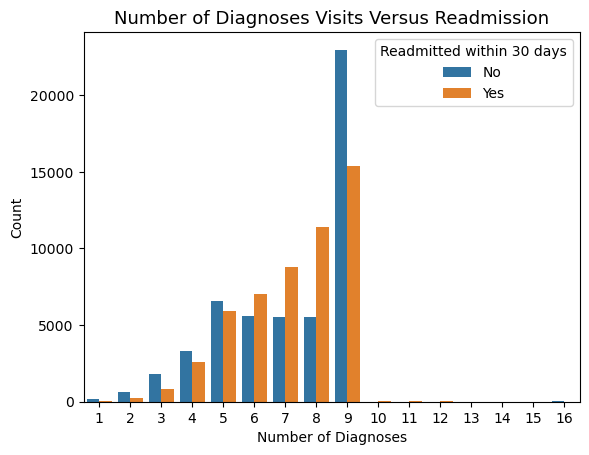

In [48]:
# --- Figuring out the distribution of response variable (readmitted) with number_diagnoses -- #

d = train1.number_diagnoses.unique()
d.sort()
d_sort = np.array(d).tolist()

# Creating the plot 
diagplt = sns.countplot(x = 'number_diagnoses', hue = "readmitted", data = train1, order = d_sort) 

# Formatting the plot
plt.title('Number of Diagnoses Visits Versus Readmission', size = 13)
diagplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.ylabel('Count')
plt.xlabel('Number of Diagnoses')


Text(0.5, 0, 'Number of Emergency Visits')

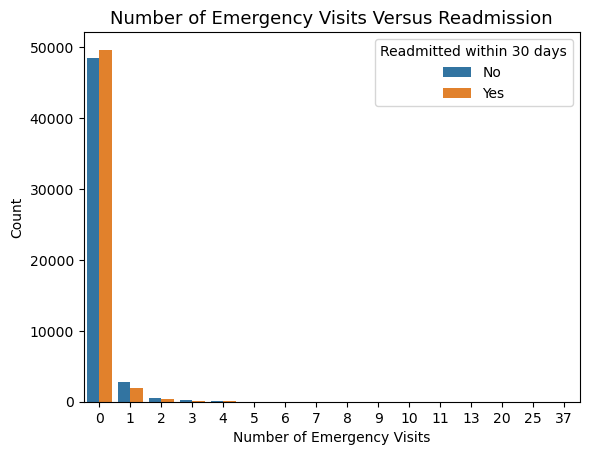

In [49]:
# --- Figuring out the distribution of response variable (readmitted) with number_emergency -- #

d = train1.number_emergency.unique()
d.sort()
d_sort = np.array(d).tolist()

# Creating the plot 
emergencyplt = sns.countplot(x = 'number_emergency', hue = "readmitted", data = train1, order = d_sort) 

# Formatting the plot 
plt.title('Number of Emergency Visits Versus Readmission', size = 13)
emergencyplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.ylabel('Count')
plt.xlabel('Number of Emergency Visits')


Text(0.5, 0, 'Number of Medication Changes')

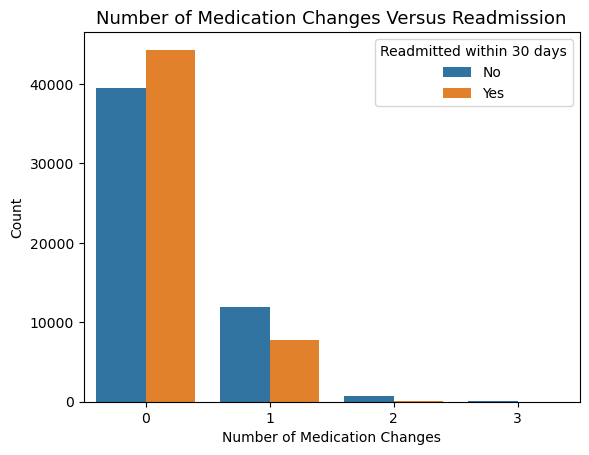

In [50]:
# --- Figuring out the distribution of response variable (readmitted) with number of medication changes -- #

d = train1.num_of_changes.unique()
d.sort()
d_sort = np.array(d).tolist()

# Creating the plot 
changesplt = sns.countplot(x = 'num_of_changes', hue = "readmitted", data = train1, order = d_sort) 

# Formatting the plot
plt.title('Number of Medication Changes Versus Readmission', size = 13)
changesplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.ylabel('Count')
plt.xlabel('Number of Medication Changes')


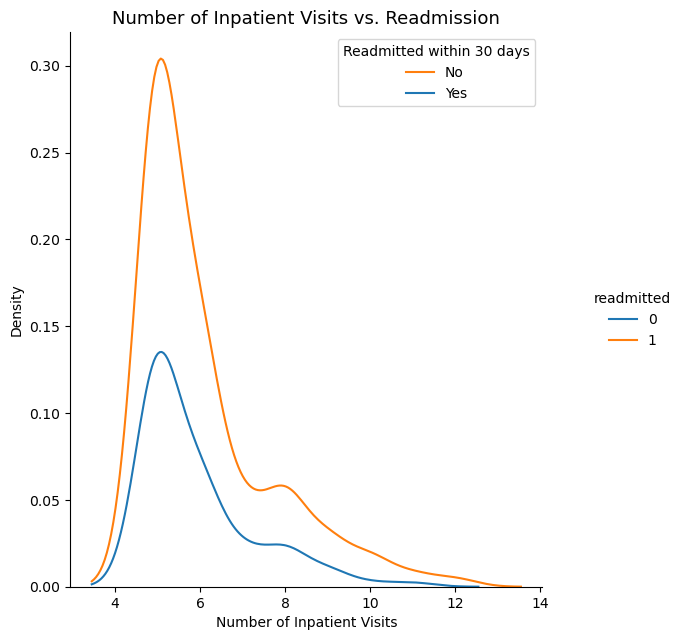

In [51]:
# --- Figuring out the distribution of response variable (readmitted) with number of inpatient visits -- #

# Creating the plot 
ax1 = sns.displot(train1.loc[train1['number_inpatient']>=5], x="number_inpatient", hue= 'readmitted', kind='kde')

# Formatting the plot 
plt.title('Number of Inpatient Visits vs. Readmission', size = 13)
ax1.figure.set_size_inches(7, 6.5)
plt.xlabel('Number of Inpatient Visits')
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))

Text(0, 0.5, 'Time Spent in Hospital')

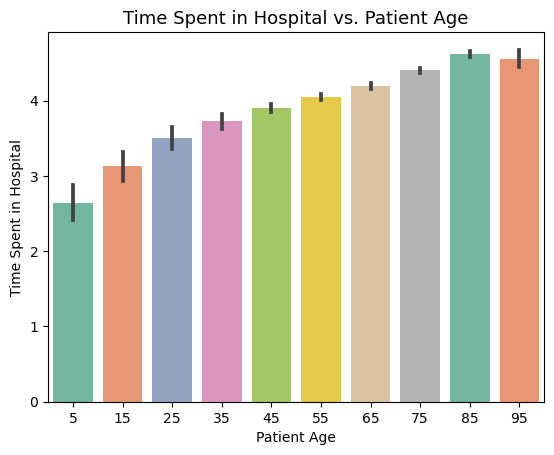

In [52]:
# --- Patient age vs. time spent in hospital -- #

# Creating the plot 
sns.barplot(x = "age", y = "time_in_hospital", data = train1, palette = "Set2")

# Formatting the plot 
plt.title('Time Spent in Hospital vs. Patient Age', size = 13)
plt.xlabel("Patient Age")
plt.ylabel('Time Spent in Hospital')


Text(0, 0.5, 'Number of Inpatient Visits')

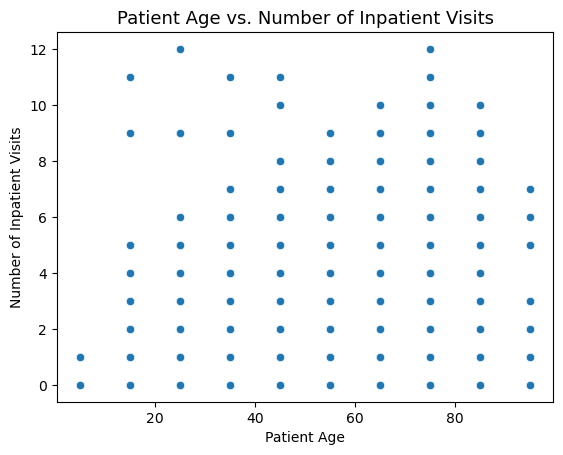

In [53]:
# --- Patient age vs. number of inpatient visits -- #

# Creating the plot 
sns.scatterplot(x = "age", y = "number_inpatient", data = train1)

# Formatting the plot 
plt.title('Patient Age vs. Number of Inpatient Visits', size = 13)
plt.xlabel("Patient Age")
plt.ylabel('Number of Inpatient Visits')

Text(0, 0.5, 'Number of Inpatient Visits')

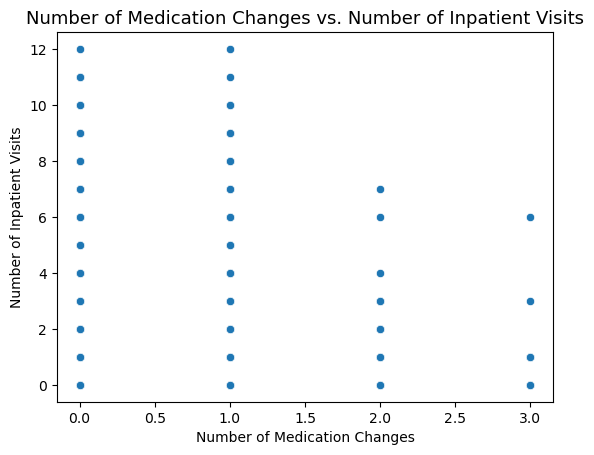

In [54]:
# --- Number of medication changes vs. number of inpatient visits -- #

# Creating the plot
sns.scatterplot(x = "num_of_changes", y = "number_inpatient", data = train1)

# Formatting the plot
plt.title('Number of Medication Changes vs. Number of Inpatient Visits', size = 13)
plt.xlabel("Number of Medication Changes")
plt.ylabel('Number of Inpatient Visits')

Text(0, 0.5, 'Patient Age')

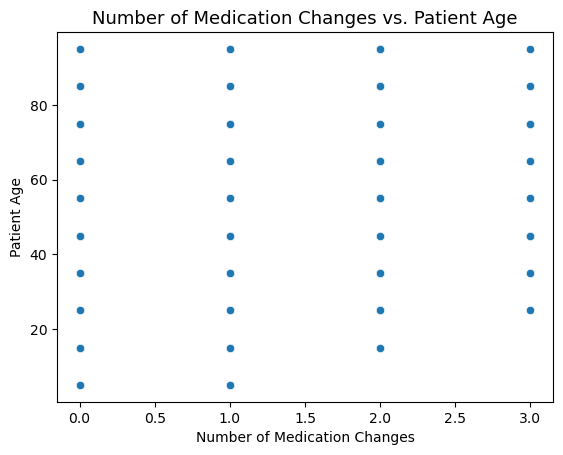

In [55]:
# --- Number of medication changes vs. age -- #

# Creating the plot 
sns.scatterplot(x = "num_of_changes", y = "age", data = train1)

# Formatting the plot 
plt.title('Number of Medication Changes vs. Patient Age', size = 13)
plt.xlabel("Number of Medication Changes")
plt.ylabel('Patient Age')


Text(0, 0.5, 'Time Spent in Hospital')

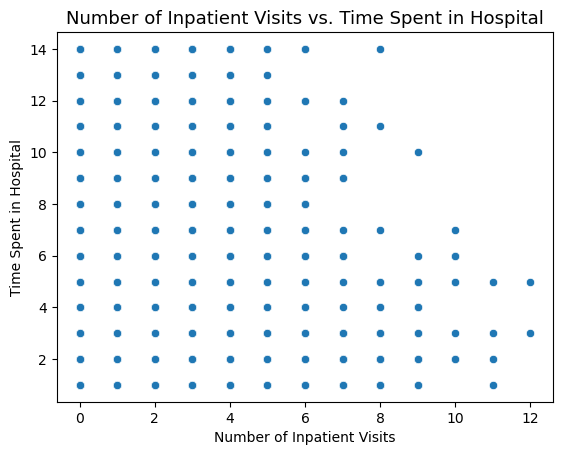

In [56]:
# --- Number of inpatient visits vs. time spent in hospital -- #

# Creating the plot 
sns.scatterplot(x = "number_inpatient", y = "time_in_hospital", data = train1)

# Formatting the plot 
plt.title('Number of Inpatient Visits vs. Time Spent in Hospital', size = 13)
plt.xlabel("Number of Inpatient Visits")
plt.ylabel('Time Spent in Hospital')

Text(0, 0.5, 'Time Spent in Hospital')

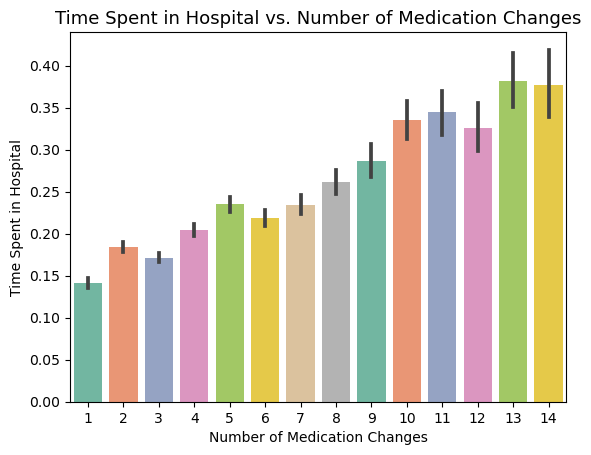

In [57]:
# --- Time spent in hospital vs. number of medication changes -- #

# Creating the plot 
sns.barplot(x = "time_in_hospital", y = "num_of_changes", data = train1, palette = "Set2")

# Formatting the plot 
plt.title('Time Spent in Hospital vs. Number of Medication Changes', size = 13)
plt.xlabel("Number of Medication Changes")
plt.ylabel('Time Spent in Hospital')

## Developing the Model
*By Anastasia Wei, Lila Wells, Kaitlyn Hung, and Amy Wang*

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Confusion Matrix to Evaluate Models (*Taken from class notes*)

In [58]:
from sklearn.metrics import roc_curve, auc

#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

### Preliminary model development
*Lila Wells and Kaitlyn Hung*

The code below executes our base model, which we created based on our exploratory data analysis.

In [59]:
# Fitting a preliminary model based on EDA
logit_model = sm.logit(formula = 'readmitted ~ time_in_hospital*age + num_of_changes + number_inpatient', data = train_undersampling).fit() #Developing logistic regression model
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.677305
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                10055
Model:                          Logit   Df Residuals:                    10049
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.02285
Time:                        00:26:20   Log-Likelihood:                -6810.3
converged:                       True   LL-Null:                       -6969.5
Covariance Type:            nonrobust   LLR p-value:                 1.064e-66
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.2680      0.160     -7.909      0.000      -1.582      -0.954
time_in_hospital         0.1183      0.032      3.724      0.000       0.056       0.181
age                      0.0138      0.002      5.831      0.000       0.009       0.018
time_in_hospital:age    -0.0011      0.000     -2.331      0.020      -0.002      -0.000
num_of_changes           0.1407      0.043      3.305      0.001       0.057       0.224
number_inpatient         0.3855      0.032     12.069      0.000       0.323       0.448
========================================================================================
"""

#### Base Model Performance on Training Data

Testing the model's performance on training data

Classification accuracy = 56.9%
Precision = 57.9%
TPR or Recall = 49.3%
FNR = 50.7%
FPR = 35.5%
ROC-AUC = 59.7%


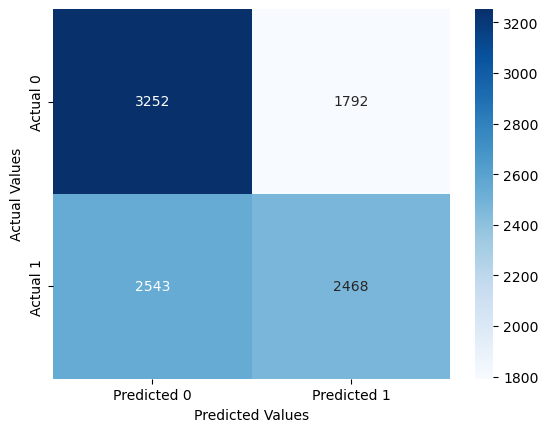

In [60]:
# Finding model performance metrics with train data (undersampling)
confusion_matrix_data(train_undersampling, train_undersampling.readmitted, logit_model, cutoff=0.5)

#### Base Model Performance on Test Data 

Testing the base model's performance on test data

Classification accuracy = 63.6%
Precision = 11.9%
TPR or Recall = 47.6%
FNR = 52.4%
FPR = 34.8%
ROC-AUC = 59.4%


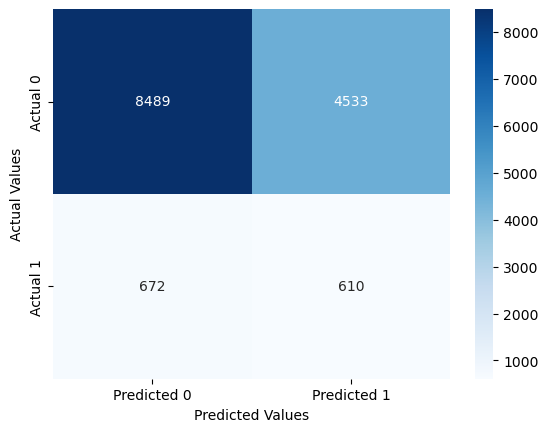

In [61]:
# Finding model performance metrics with test data (undersampling)
confusion_matrix_data(test, test.readmitted, logit_model, cutoff=0.5)

#### Refitting the Base Model with SMOTENC Data 

To see if the base model performed better with SMOTENC data, we refit the model accordingly

In [62]:
# Refitting the model with SMOTENC data 
logit_model2 = sm.logit(formula = 'readmitted ~ time_in_hospital*age + num_of_changes + number_inpatient', data = train1).fit() #Developing logistic regression model
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.673759
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104400
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.02797
Time:                        00:26:20   Log-Likelihood:                -70345.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.9434      0.056    -34.777      0.000      -2.053      -1.834
time_in_hospital         0.1791      0.011     15.697      0.000       0.157       0.201
age                      0.0296      0.001     36.350      0.000       0.028       0.031
time_in_hospital:age    -0.0025      0.000    -15.468      0.000      -0.003      -0.002
num_of_changes          -0.5601      0.015    -36.302      0.000      -0.590      -0.530
number_inpatient         0.1535      0.010     14.935      0.000       0.133       0.174
========================================================================================
"""

##### Base Model Performance on Training Data with SMOTENC

Testing the model's performance with SMOTENC training data

Classification accuracy = 58.7%
Precision = 57.3%
TPR or Recall = 68.6%
FNR = 31.4%
FPR = 51.2%
ROC-AUC = 60.2%


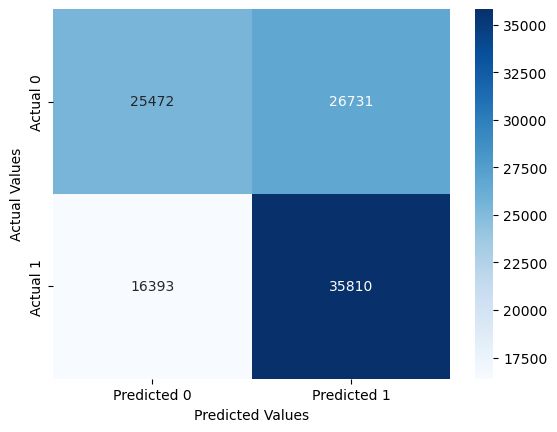

In [63]:
# Finding the model's performance metrics with train data (SMOTENC)
confusion_matrix_data(train1, train1.readmitted, logit_model2, cutoff=0.5)


##### Base Model Performance on Test Data with SMOTENC

Testing the model's performance with test data

Classification accuracy = 50.2%
Precision = 9.9%
TPR or Recall = 56.2%
FNR = 43.8%
FPR = 50.4%
ROC-AUC = 54.4%


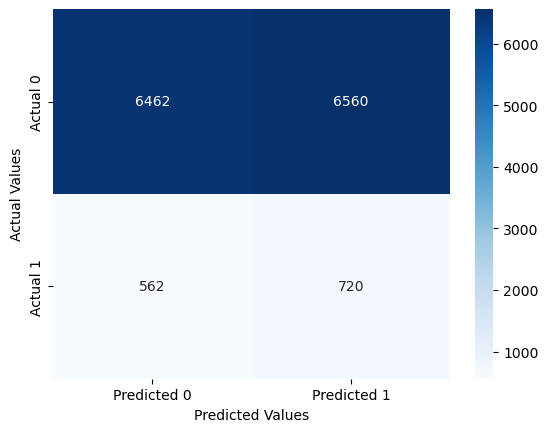

In [64]:
# Finding the model's performance metrics with test data (SMOTENC)
confusion_matrix_data(test, test.readmitted, logit_model2, cutoff=0.5)


#### Optimizing for the Decision Threshold

Seeing if we can further improve our model's recall (and decrease its False Negative Rate) by optimizing the decision threshold)

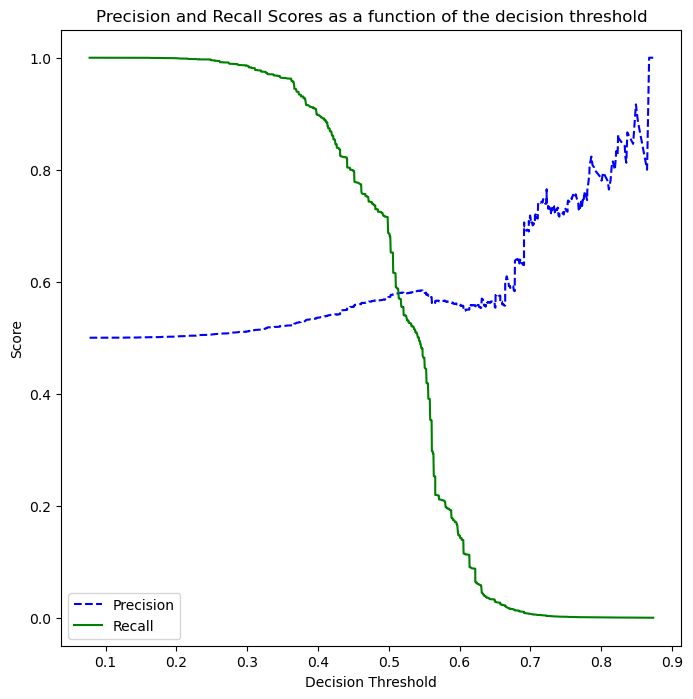

In [65]:
# Finding the percentage of positive values
perc = train1.readmitted.mean()

# Plotting precision and recall scores as a function of the decision threshold
from sklearn.metrics import precision_recall_curve

y = train1.readmitted
ypred = logit_model2.predict(train1)
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)


In [66]:
lista = []

# Iterate thru thresholds, get true_pos / true_neg, find corresponding threshold
for i in thresholds: 
    # Confusion matrix
    cm_df = pd.DataFrame(logit_model2.pred_table(threshold = i))
    lista.append(cm_df[1].sum() / len(train1))

# Finding the optimal threshold
b = (perc * r[:-1]) - ((1 - p[:-1]) * lista)
c = thresholds[np.argmax(b)] 
opt_threshold = c

# Printing the optimal threshold I found using precision and recall
print('Optimal threshold:', opt_threshold)


Optimal threshold: 0.5057759652056344


#### Testing Base Model Performance With Optimized Threshold

Testing our model's train and test performance with the optimized threshold on SMOTENC data

Classification accuracy = 58.7%
Precision = 57.7%
TPR or Recall = 65.2%
FNR = 34.8%
FPR = 47.8%
ROC-AUC = 60.2%


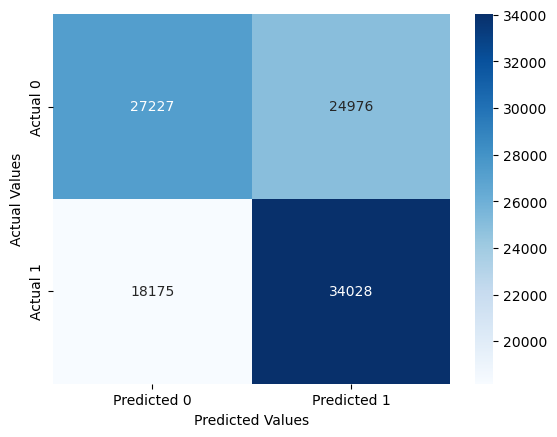

In [67]:
# Finding the model performance metrics on train data (SMOTENC) (with optimized threshold)
confusion_matrix_data(train1, train1.readmitted, logit_model2, cutoff=opt_threshold)



Classification accuracy = 53.2%
Precision = 10.0%
TPR or Recall = 53.0%
FNR = 47.0%
FPR = 46.8%
ROC-AUC = 54.4%


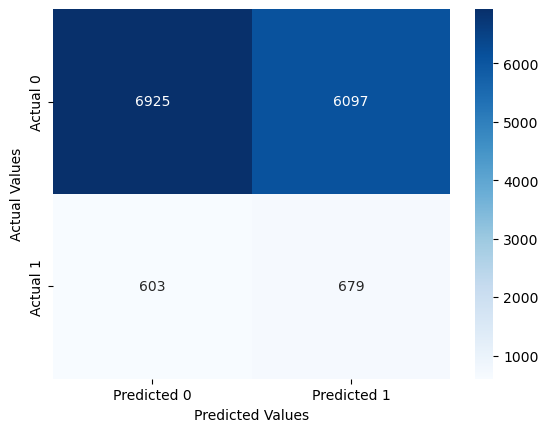

In [68]:
# Finding the model performance metrics on test data (with optimized threshold)
confusion_matrix_data(test, test.readmitted, logit_model2, cutoff=opt_threshold)



### Model Optimization
*Amy Wang*

In the following models, I built upon the preliminary models with variable selection. I noticed that individual values of the categorical predictors such as `age` and `time_in_hospital` have different distributions, and created a few exploratory models investigating the sole effect of these predictors, the combined effect, and experimenting with interactions.

I created a final model combining the promising results of this investigation.

To summarize the following code:
1. Model 1.1: Making each value of `age` its own predictor
2. Model 1.2: Adding in the other variables in the original `logit_model`
3. Model 1.3: Interaction between `time_in_hospital` and each `age` value
4. Model 2.1: Making each value of `time_in_hospital` its own predictor
5. Model 2.2: Adding the interaction between each value of `time_in_hospital` with `num_of_changes`
6. Model 2.3: Making each value of both `time_in_hospital` and `age` their own predictors
7. Model 3.1: Investigate the predictive capability of `diag_1`
8. Model 3.2: Investigate the predictive capability of both `diag_1` and `diag_2`
9. Model 3.2: Investigate the predictive capability of `diag_1`, `diag_2`, and `diag_3`
10. Model 4.1: Make non-collinear values of `discharge_disposition_id` its own predictor
11. Model 4.2: Make non-collinear values of `admission_source_id` its own predictor
12. Model 4.3: Make non-collinear values of `admission_type` its own predictor
13. Model 5: A combined model incorporating all insights from the previous 12 models

Text(0.5, 0, 'age')

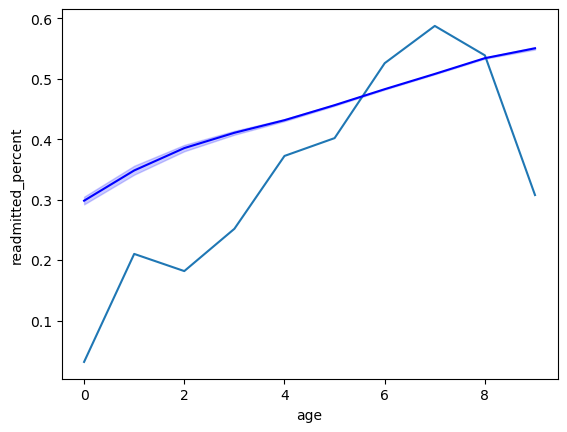

In [69]:
# Understand the baseline model: investigate how well the logit_model predicts hospital readmission based on age -- training data
age_data = train1.groupby('age')['readmitted'].agg([('readmitted_percent','mean'),('nobs','count')]).reset_index(drop=False)
train1_dummy["age_ind"] =  train1_dummy["age"].map({5: 0, 15: 1, 25: 2, 35: 3, 45: 4, 55: 5, 65: 6, 75: 7, 85: 8, 95: 9, 105: 10})
sns.lineplot(x = age_data.index, y= age_data['readmitted_percent'])
sns.lineplot(x = 'age_ind', y= logit_model.predict(train1_dummy), data = train1_dummy, color = 'blue') 
plt.xlabel('age')

In [70]:
# Examine whether there are multicollinear variables for variable selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train1_dummy[['age5', 'age15', 'age25', 'age35', 'age45', 'age55',
       'age65', 'age75', 'age85', 'time_in_hospital1',
       'time_in_hospital2', 'time_in_hospital3', 'time_in_hospital4',
       'time_in_hospital5', 'time_in_hospital6', 'time_in_hospital7',
       'time_in_hospital8', 'time_in_hospital9', 'time_in_hospital10',
       'time_in_hospital11', 'time_in_hospital12', 'time_in_hospital13', 'admission_type_id1', 'admission_type_id3',
       'admission_type_id4', 'discharge_disposition_id7',
       'discharge_disposition_id10', 'discharge_disposition_id11',
       'discharge_disposition_id18', 'discharge_disposition_id27', 'admission_source_id8',
       'admission_source_id9', 'number_inpatient', 'num_of_changes',  'diag_1circulatory',
       'diag_1diabetes', 'diag_1digestive', 'diag_1musculoskeletal', 'diag_1neoplasms', 'diag_1other', 'diag_1pregnecy', 'diag_1respiratory', 'diag_2circulatory', 'diag_2diabetes', 'diag_2digestive', 'diag_2musculoskeletal', 'diag_2neoplasms','diag_2other', 'diag_2pregnecy', 'diag_2respiratory']]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

Model 1.1: Making each value of `age` its own predictor

In [71]:
model1_1 = sm.logit(formula = "readmitted ~ age5 + age15 + age25 + age35 + age45 + age55 + age65 + age75 + age85", data = train1_dummy).fit() 
model1_1.summary()

Optimization terminated successfully.
         Current function value: 0.673768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104396
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.02796
Time:                        00:26:43   Log-Likelihood:                -70345.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8111      0.048    -16.846      0.000      -0.905      -0.717
age5          -2.6148      0.510     -5.124      0.000      -3.615      -1.615
age15         -0.5124      0.117     -4.374      0.000      -0.742      -0.283
age25         -0.6930      0.095     -7.291      0.000      -0.879      -0.507
age35         -0.2779      0.066     -4.226      0.000      -0.407      -0.149
age45          0.2890      0.053      5.416      0.000       0.184       0.394
age55          0.4134      0.051      8.127      0.000       0.314       0.513
age65          0.9146      0.050     18.361      0.000       0.817       1.012
age75          1.1648      0.049     23.544      0.000       1.068       1.262
age85          0.9667      0.050     19.174      0.000       0.868       1.065
==============================================================================
"""

Classification accuracy = 57.9%
Precision = 55.5%
TPR or Recall = 79.3%
FNR = 20.7%
FPR = 63.5%
ROC-AUC = 59.9%


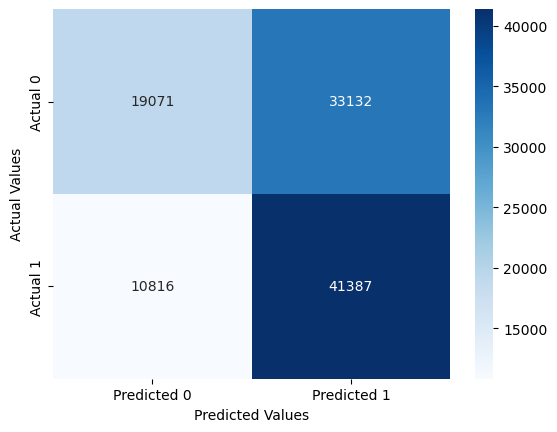

In [72]:
confusion_matrix_data(train1_dummy, train1_dummy.readmitted, model1_1, cutoff=0.5)

Classification accuracy = 40.2%
Precision = 10.1%
TPR or Recall = 71.4%
FNR = 28.6%
FPR = 62.9%
ROC-AUC = 54.6%


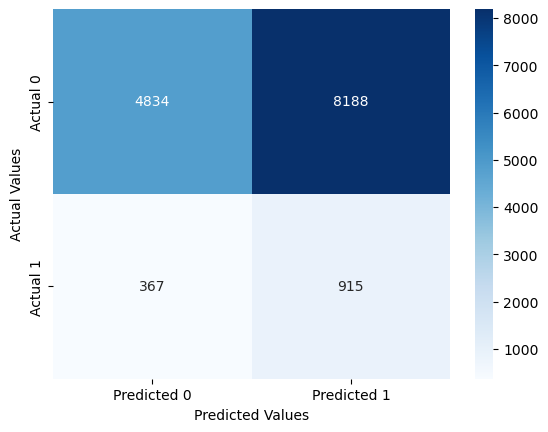

In [73]:
confusion_matrix_data(test_dummy, test_dummy.readmitted, model1_1, cutoff=0.5)

*Note: each subsequent model will be evaluated using the confusion matrices in the same way, with the same 0.5 cutoff. The summary statistics will be copied directly for brevity of this report.*

Text(0.5, 0, 'age')

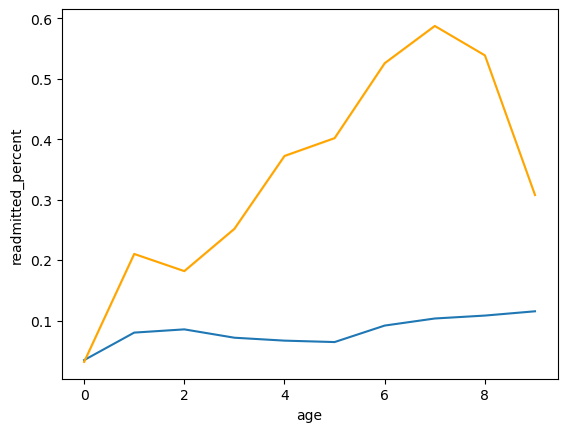

In [74]:
# Visual inspection of how well the logit_model predicts hospital readmission based on age, on test data. The plot suggests overfitting.
age_data = test.groupby('age')['readmitted'].agg([('readmitted_percent','mean'),('nobs','count')]).reset_index(drop=False)
test_dummy["age_ind"] =  test_dummy["age"].map({5: 0, 15: 1, 25: 2, 35: 3, 45: 4, 55: 5, 65: 6, 75: 7, 85: 8, 95: 9, 105: 10})
sns.lineplot(x = age_data.index, y= age_data['readmitted_percent'])
sns.lineplot(x = 'age_ind', y= model1_1.predict(test_dummy), data = test_dummy, color = 'orange') 
plt.xlabel('age')

Model 1.2: Adding in the other variables in the original `logit_model`

In [75]:
model1_2 = sm.logit(formula = "readmitted ~ time_in_hospital + age5 + age15 + age25 + age35 + age45 + age55 + age65 + age75 + age85 + num_of_changes + number_inpatient", data = train1_dummy).fit() 
model1_2.summary()

Optimization terminated successfully.
         Current function value: 0.666237
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104393
Method:                           MLE   Df Model:                           12
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.03882
Time:                        00:26:45   Log-Likelihood:                -69559.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7694      0.050    -15.536      0.000      -0.866      -0.672
time_in_hospital     0.0056      0.002      2.455      0.014       0.001       0.010
age5                -2.5779      0.511     -5.048      0.000      -3.579      -1.577
age15               -0.4395      0.118     -3.726      0.000      -0.671      -0.208
age25               -0.5861      0.096     -6.119      0.000      -0.774      -0.398
age35               -0.2211      0.066     -3.338      0.001      -0.351      -0.091
age45                0.3349      0.054      6.235      0.000       0.230       0.440
age55                0.4346      0.051      8.494      0.000       0.334       0.535
age65                0.9385      0.050     18.730      0.000       0.840       1.037
age75                1.1731      0.050     23.580      0.000       1.076       1.271
age85                0.9589      0.051     18.915      0.000       0.860       1.058
num_of_changes      -0.5557      0.016    -35.728      0.000      -0.586      -0.525
number_inpatient     0.1564      0.010     15.103      0.000       0.136       0.177
====================================================================================
"""

Metrics on training data <br>
- Classification accuracy = 59.5%
- Precision = 58.0%
- TPR or Recall = 69.0%
- FNR = 31.0%
- FPR = 50.0%
- ROC-AUC = 62.8%

Metrics on test data <br>
- Classification accuracy = 51.0%
- Precision = 10.1%
- TPR or Recall = 55.3%
- FNR = 44.7%
- FPR = 49.4%
- ROC-AUC = 54.9%

Model 1.3: Interaction between `time_in_hospital` and each `age` value

In [76]:
model1_3 = sm.logit(formula = 'readmitted ~ time_in_hospital*age5 + time_in_hospital*age15 + time_in_hospital*age25 + time_in_hospital*age35 + time_in_hospital*age45 + time_in_hospital*age55 + time_in_hospital*age65 + time_in_hospital*age75 + time_in_hospital*age85 +  + num_of_changes + number_inpatient', data = train1_dummy).fit(maxiter = 100) 
model1_3.summary()

Optimization terminated successfully.
         Current function value: 0.665456
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104384
Method:                           MLE   Df Model:                           21
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.03995
Time:                        00:26:45   Log-Likelihood:                -69478.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4724      0.094     -5.005      0.000      -0.657      -0.287
time_in_hospital          -0.0610      0.019     -3.279      0.001      -0.097      -0.025
age5                      -3.3380      1.117     -2.988      0.003      -5.527      -1.149
time_in_hospital:age5      0.2310      0.332      0.695      0.487      -0.420       0.882
age15                     -1.4016      0.214     -6.556      0.000      -1.821      -0.983
time_in_hospital:age15     0.2621      0.047      5.531      0.000       0.169       0.355
age25                     -1.1466      0.175     -6.542      0.000      -1.490      -0.803
time_in_hospital:age25     0.1399      0.038      3.715      0.000       0.066       0.214
age35                     -0.8212      0.123     -6.660      0.000      -1.063      -0.580
time_in_hospital:age35     0.1461      0.025      5.872      0.000       0.097       0.195
age45                     -0.0983      0.103     -0.956      0.339      -0.300       0.103
time_in_hospital:age45     0.1016      0.020      4.969      0.000       0.062       0.142
age55                     -0.0135      0.099     -0.137      0.891      -0.207       0.180
time_in_hospital:age55     0.1041      0.020      5.332      0.000       0.066       0.142
age65                      0.6448      0.097      6.638      0.000       0.454       0.835
time_in_hospital:age65     0.0660      0.019      3.447      0.001       0.028       0.104
age75                      0.9139      0.097      9.453      0.000       0.724       1.103
time_in_hospital:age75     0.0582      0.019      3.059      0.002       0.021       0.095
age85                      0.8193      0.099      8.306      0.000       0.626       1.013
time_in_hospital:age85     0.0326      0.019      1.688      0.091      -0.005       0.071
num_of_changes            -0.5583      0.016    -35.885      0.000      -0.589      -0.528
number_inpatient           0.1550      0.010     14.958      0.000       0.135       0.175
==========================================================================================
"""

Metrics on training data
- Classification accuracy = 59.4%
- Precision = 57.9%
- TPR or Recall = 69.5%
- FNR = 30.5%
- FPR = 50.6%
- ROC-AUC = 62.7%

Metrics on test data
- Classification accuracy = 50.5%
- Precision = 10.1%
- TPR or Recall = 55.8%
- FNR = 44.2%
- FPR = 50.0%
- ROC-AUC = 54.4%

Model 2.1: Making each value of `time_in_hospital` its own predictor

In [77]:
model2_1 = sm.logit(formula = 'readmitted ~ time_in_hospital1 + time_in_hospital2 + time_in_hospital3 + time_in_hospital4 + time_in_hospital5 + time_in_hospital6 + time_in_hospital7 + time_in_hospital8 + time_in_hospital9 + time_in_hospital10 + time_in_hospital11 + time_in_hospital12 + time_in_hospital13 + num_of_changes + number_inpatient', data = train1_dummy).fit() 
model2_1.summary()

Optimization terminated successfully.
         Current function value: 0.681213
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104390
Method:                           MLE   Df Model:                           15
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.01722
Time:                        00:26:46   Log-Likelihood:                -71123.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2712      0.076     -3.562      0.000      -0.420      -0.122
time_in_hospital1      0.0736      0.078      0.945      0.345      -0.079       0.226
time_in_hospital2      0.3181      0.077      4.109      0.000       0.166       0.470
time_in_hospital3      0.4014      0.077      5.190      0.000       0.250       0.553
time_in_hospital4      0.4499      0.078      5.787      0.000       0.298       0.602
time_in_hospital5      0.4100      0.079      5.219      0.000       0.256       0.564
time_in_hospital6      0.5636      0.079      7.114      0.000       0.408       0.719
time_in_hospital7      0.5963      0.080      7.451      0.000       0.439       0.753
time_in_hospital8      0.5462      0.082      6.674      0.000       0.386       0.707
time_in_hospital9      0.2071      0.086      2.418      0.016       0.039       0.375
time_in_hospital10     0.3099      0.088      3.515      0.000       0.137       0.483
time_in_hospital11     0.0908      0.092      0.983      0.326      -0.090       0.272
time_in_hospital12     0.2291      0.095      2.400      0.016       0.042       0.416
time_in_hospital13     0.1212      0.100      1.208      0.227      -0.075       0.318
num_of_changes        -0.6034      0.015    -39.415      0.000      -0.633      -0.573
number_inpatient       0.1603      0.010     15.615      0.000       0.140       0.180
======================================================================================
"""

Metrics on training data
- Classification accuracy = 56.2%
- Precision = 54.7%
- TPR or Recall = 72.7%
- FNR = 27.3%
- FPR = 60.2%
- ROC-AUC = 58.5%

Metrics on test data
- Classification accuracy = 42.2%
- Precision = 9.5%
- TPR or Recall = 61.9%
- FNR = 38.1%
- FPR = 59.8%
- ROC-AUC = 53.0%

Model 2.2: Adding the interaction between each value of `time_in_hospital` with `num_of_changes`

In [78]:
model2_2 = sm.logit(formula = 'readmitted ~ num_of_changes*time_in_hospital1 + num_of_changes*time_in_hospital2 + num_of_changes*time_in_hospital3 + num_of_changes*time_in_hospital4 + num_of_changes*time_in_hospital5 + num_of_changes*time_in_hospital6 + num_of_changes*time_in_hospital7 + num_of_changes*time_in_hospital8 + num_of_changes*time_in_hospital9 + num_of_changes*time_in_hospital10 + num_of_changes*time_in_hospital11 + num_of_changes*time_in_hospital12 + num_of_changes*time_in_hospital13', data = train1_dummy).fit() 
model2_2.summary()

Optimization terminated successfully.
         Current function value: 0.680300
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104378
Method:                           MLE   Df Model:                           27
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.01853
Time:                        00:26:46   Log-Likelihood:                -71027.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2101      0.090     -2.328      0.020      -0.387      -0.033
num_of_changes                       -0.6635      0.151     -4.397      0.000      -0.959      -0.368
time_in_hospital1                    -0.0367      0.092     -0.399      0.690      -0.217       0.144
num_of_changes:time_in_hospital1      0.6017      0.158      3.800      0.000       0.291       0.912
time_in_hospital2                     0.1959      0.092      2.135      0.033       0.016       0.376
num_of_changes:time_in_hospital2      0.5647      0.156      3.631      0.000       0.260       0.870
time_in_hospital3                     0.3953      0.092      4.313      0.000       0.216       0.575
num_of_changes:time_in_hospital3     -0.1028      0.156     -0.659      0.510      -0.408       0.203
time_in_hospital4                     0.4298      0.092      4.665      0.000       0.249       0.610
num_of_changes:time_in_hospital4      0.0085      0.156      0.054      0.957      -0.298       0.315
time_in_hospital5                     0.4194      0.093      4.506      0.000       0.237       0.602
num_of_changes:time_in_hospital5     -0.1197      0.158     -0.757      0.449      -0.429       0.190
time_in_hospital6                     0.5890      0.094      6.283      0.000       0.405       0.773
num_of_changes:time_in_hospital6     -0.1692      0.160     -1.057      0.290      -0.483       0.144
time_in_hospital7                     0.6589      0.095      6.954      0.000       0.473       0.845
num_of_changes:time_in_hospital7     -0.3415      0.162     -2.106      0.035      -0.659      -0.024
time_in_hospital8                     0.5894      0.097      6.085      0.000       0.400       0.779
num_of_changes:time_in_hospital8     -0.2253      0.165     -1.362      0.173      -0.550       0.099
time_in_hospital9                     0.2747      0.101      2.720      0.007       0.077       0.473
num_of_changes:time_in_hospital9     -0.2935      0.175     -1.672      0.094      -0.637       0.050
time_in_hospital10                    0.2861      0.105      2.738      0.006       0.081       0.491
num_of_changes:time_in_hospital10     0.0562      0.176      0.320      0.749      -0.288       0.400
time_in_hospital11                    0.0881      0.109      0.807      0.420      -0.126       0.302
num_of_changes:time_in_hospital11     0.0339      0.184      0.184      0.854      -0.327       0.395
time_in_hospital12                    0.2955      0.113      2.622      0.009       0.075       0.516
num_of_changes:time_in_hospital12    -0.2643      0.195     -1.353      0.176      -0.647       0.119
time_in_hospital13                    0.1642      0.120      1.371      0.170      -0.070       0.399
num_of_changes:time_in_hospital13    -0.1578      0.201     -0.787      0.431      -0.551       0.235
===============================================================================

Metrics on training data
- Classification accuracy = 56.2%
- Precision = 55.9%
- TPR or Recall = 58.4%
- FNR = 41.6%
- FPR = 46.0%
- ROC-AUC = 58.2%

Metrics on test data
- Classification accuracy = 53.8%
- Precision = 9.8%
- TPR or Recall = 49.2%
- FNR = 50.8%
- FPR = 45.8%
- ROC-AUC = 50.7%

Model 2.3: Making each value of both `time_in_hospital` and `age` their own predictors

In [79]:
model2_3 = sm.logit(formula = 'readmitted ~ time_in_hospital1 + time_in_hospital2 + time_in_hospital3 + time_in_hospital4 + time_in_hospital5 + time_in_hospital6 + time_in_hospital7 + time_in_hospital8 + time_in_hospital9 + time_in_hospital10 + time_in_hospital11 + time_in_hospital12 + time_in_hospital13 + num_of_changes + number_inpatient + age5 + age15 + age25 + age35 + age45 + age55 + age65 + age75 + age85', data = train1_dummy).fit() 
model2_3.summary()

Optimization terminated successfully.
         Current function value: 0.663693
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104381
Method:                           MLE   Df Model:                           24
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.04249
Time:                        00:26:46   Log-Likelihood:                -69294.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1961      0.091    -13.148      0.000      -1.374      -1.018
time_in_hospital1      0.1705      0.079      2.163      0.031       0.016       0.325
time_in_hospital2      0.4317      0.078      5.508      0.000       0.278       0.585
time_in_hospital3      0.4893      0.078      6.251      0.000       0.336       0.643
time_in_hospital4      0.5156      0.079      6.554      0.000       0.361       0.670
time_in_hospital5      0.4628      0.080      5.821      0.000       0.307       0.619
time_in_hospital6      0.6072      0.080      7.573      0.000       0.450       0.764
time_in_hospital7      0.6318      0.081      7.802      0.000       0.473       0.791
time_in_hospital8      0.5763      0.083      6.960      0.000       0.414       0.739
time_in_hospital9      0.2376      0.087      2.741      0.006       0.068       0.407
time_in_hospital10     0.3342      0.089      3.745      0.000       0.159       0.509
time_in_hospital11     0.1172      0.093      1.255      0.209      -0.066       0.300
time_in_hospital12     0.2571      0.097      2.661      0.008       0.068       0.446
time_in_hospital13     0.1218      0.101      1.200      0.230      -0.077       0.321
num_of_changes        -0.5568      0.016    -35.707      0.000      -0.587      -0.526
number_inpatient       0.1547      0.010     14.894      0.000       0.134       0.175
age5                  -2.5622      0.511     -5.016      0.000      -3.563      -1.561
age15                 -0.4160      0.118     -3.520      0.000      -0.648      -0.184
age25                 -0.5689      0.096     -5.931      0.000      -0.757      -0.381
age35                 -0.2014      0.066     -3.035      0.002      -0.332      -0.071
age45                  0.3559      0.054      6.608      0.000       0.250       0.461
age55                  0.4574      0.051      8.916      0.000       0.357       0.558
age65                  0.9598      0.050     19.103      0.000       0.861       1.058
age75                  1.1895      0.050     23.847      0.000       1.092       1.287
age85                  0.9650      0.051     18.989      0.000       0.865       1.065
======================================================================================
"""

Metrics on training data
- Classification accuracy = 59.7%
- Precision = 58.8%
- TPR or Recall = 65.3%
- FNR = 34.7%
- FPR = 45.8%
- ROC-AUC = 63.4%

Metrics on test data
- Classification accuracy = 54.0%
- Precision = 10.1%
- TPR or Recall = 51.0%
- FNR = 49.0%
- FPR = 45.6%
- ROC-AUC = 54.6%

Model 3.1: Investigate the predictive capability of `diag_1`

In [80]:
model3_1 = sm.logit(formula = 'readmitted ~ diag_1', data = train1).fit() 
model3_1.summary()

Optimization terminated successfully.
         Current function value: 0.673928
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104396
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.02773
Time:                        00:26:47   Log-Likelihood:                -70362.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.4331      0.010     42.510      0.000       0.413       0.453
diag_1[T.diabetes]           -0.7529      0.026    -29.237      0.000      -0.803      -0.702
diag_1[T.digestive]          -0.8792      0.025    -34.917      0.000      -0.929      -0.830
diag_1[T.genitourinary]      -0.8101      0.033    -24.626      0.000      -0.875      -0.746
diag_1[T.injury]             -0.5848      0.027    -21.600      0.000      -0.638      -0.532
diag_1[T.musculoskeletal]    -0.9309      0.031    -29.706      0.000      -0.992      -0.869
diag_1[T.neoplasms]          -1.1416      0.040    -28.614      0.000      -1.220      -1.063
diag_1[T.other]              -0.3776      0.018    -20.761      0.000      -0.413      -0.342
diag_1[T.pregnecy]           -2.2049      0.124    -17.711      0.000      -2.449      -1.961
diag_1[T.respiratory]        -0.8243      0.021    -38.980      0.000      -0.866      -0.783
=============================================================================================
"""

Metrics on training data
- Classification accuracy = 58.5%
- Precision = 57.7%
- TPR or Recall = 63.7%
- FNR = 36.3%
- FPR = 46.7%
- ROC-AUC = 60.6%

Metrics on test data
- Classification accuracy = 52.8%
- Precision = 9.9%
- TPR or Recall = 51.3%
- FNR = 48.7%
- FPR = 47.1%
- ROC-AUC = 52.9%

Model 3.2: Investigate the predictive capability of both `diag_1` and `diag_2`

In [81]:
model3_2 = sm.logit(formula = 'readmitted ~ diag_1 + diag_2', data = train1).fit() 
model3_2.summary()

Optimization terminated successfully.
         Current function value: 0.663451
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104387
Method:                           MLE   Df Model:                           18
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.04284
Time:                        00:26:48   Log-Likelihood:                -69268.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.5894      0.012     48.275      0.000       0.565       0.613
diag_1[T.diabetes]           -0.7623      0.027    -28.703      0.000      -0.814      -0.710
diag_1[T.digestive]          -0.7681      0.026    -29.412      0.000      -0.819      -0.717
diag_1[T.genitourinary]      -0.7663      0.034    -22.857      0.000      -0.832      -0.701
diag_1[T.injury]             -0.5142      0.028    -18.479      0.000      -0.569      -0.460
diag_1[T.musculoskeletal]    -0.8239      0.032    -25.693      0.000      -0.887      -0.761
diag_1[T.neoplasms]          -0.9375      0.042    -22.511      0.000      -1.019      -0.856
diag_1[T.other]              -0.3102      0.019    -16.571      0.000      -0.347      -0.273
diag_1[T.pregnecy]           -1.2618      0.146     -8.632      0.000      -1.548      -0.975
diag_1[T.respiratory]        -0.7562      0.021    -35.177      0.000      -0.798      -0.714
diag_2[T.diabetes]           -0.3554      0.021    -17.055      0.000      -0.396      -0.315
diag_2[T.digestive]          -0.8533      0.042    -20.374      0.000      -0.935      -0.771
diag_2[T.genitourinary]      -0.5880      0.028    -21.145      0.000      -0.642      -0.533
diag_2[T.injury]             -0.9285      0.050    -18.503      0.000      -1.027      -0.830
diag_2[T.musculoskeletal]    -1.2180      0.069    -17.729      0.000      -1.353      -1.083
diag_2[T.neoplasms]          -0.6191      0.051    -12.163      0.000      -0.719      -0.519
diag_2[T.other]              -0.0047      0.016     -0.288      0.773      -0.037       0.028
diag_2[T.pregnecy]           -2.5968      0.338     -7.679      0.000      -3.260      -1.934
diag_2[T.respiratory]        -0.6143      0.025    -25.007      0.000      -0.662      -0.566
=============================================================================================
"""

Metrics on training data
- Classification accuracy = 60.4%
- Precision = 61.1%
- TPR or Recall = 57.2%
- FNR = 42.8%
- FPR = 36.4%
- ROC-AUC = 63.2%

Metrics on test data
- Classification accuracy = 61.2%
- Precision = 9.8%
- TPR or Recall = 39.4%
- FNR = 60.6%
- FPR = 36.6%
- ROC-AUC = 52.2%

Model 3.3: Investigate the predictive capability of `diag_1`, `diag_2`, and `diag_3`

In [82]:
model3_3 = sm.logit(formula = 'readmitted ~ diag_1 + diag_2 + diag_3', data = train1).fit() 
model3_3.summary()

Optimization terminated successfully.
         Current function value: 0.655316
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104378
Method:                           MLE   Df Model:                           27
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.05458
Time:                        00:26:49   Log-Likelihood:                -68419.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.7232      0.015     49.044      0.000       0.694       0.752
diag_1[T.diabetes]           -0.8090      0.027    -29.821      0.000      -0.862      -0.756
diag_1[T.digestive]          -0.7335      0.026    -27.744      0.000      -0.785      -0.682
diag_1[T.genitourinary]      -0.7351      0.034    -21.659      0.000      -0.802      -0.669
diag_1[T.injury]             -0.4834      0.028    -17.121      0.000      -0.539      -0.428
diag_1[T.musculoskeletal]    -0.7793      0.032    -24.017      0.000      -0.843      -0.716
diag_1[T.neoplasms]          -0.8739      0.042    -20.754      0.000      -0.956      -0.791
diag_1[T.other]              -0.2866      0.019    -15.116      0.000      -0.324      -0.249
diag_1[T.pregnecy]           -0.6245      0.174     -3.589      0.000      -0.966      -0.283
diag_1[T.respiratory]        -0.7404      0.022    -34.185      0.000      -0.783      -0.698
diag_2[T.diabetes]           -0.4249      0.021    -19.961      0.000      -0.467      -0.383
diag_2[T.digestive]          -0.8381      0.042    -19.798      0.000      -0.921      -0.755
diag_2[T.genitourinary]      -0.5899      0.028    -20.986      0.000      -0.645      -0.535
diag_2[T.injury]             -0.8623      0.051    -16.914      0.000      -0.962      -0.762
diag_2[T.musculoskeletal]    -1.1418      0.070    -16.374      0.000      -1.278      -1.005
diag_2[T.neoplasms]          -0.5507      0.052    -10.532      0.000      -0.653      -0.448
diag_2[T.other]              -0.0123      0.017     -0.739      0.460      -0.045       0.020
diag_2[T.pregnecy]           -2.7003      0.348     -7.753      0.000      -3.383      -2.018
diag_2[T.respiratory]        -0.6129      0.025    -24.737      0.000      -0.661      -0.564
diag_3[T.diabetes]           -0.2927      0.019    -15.191      0.000      -0.330      -0.255
diag_3[T.digestive]          -0.5900      0.041    -14.293      0.000      -0.671      -0.509
diag_3[T.genitourinary]      -0.6120      0.032    -18.862      0.000      -0.676      -0.548
diag_3[T.injury]             -1.0071      0.061    -16.622      0.000      -1.126      -0.888
diag_3[T.musculoskeletal]    -1.2490      0.072    -17.345      0.000      -1.390      -1.108
diag_3[T.neoplasms]          -0.4538      0.059     -7.685      0.000      -0.570      -0.338
diag_3[T.other]               0.0527      0.016      3.286      0.001       0.021       0.084
diag_3[T.pregnecy]           -2.1928      0.380     -5.763      0.000      -2.939      -1.447
diag_3[T.respiratory]        -0.5142      0.029    -17.571      0.000      -0.572      -0.457
=============================================================================================
"""

Metrics on training data
- Classification accuracy = 61.1%
- Precision = 60.6%
- TPR or Recall = 63.3%
- FNR = 36.7%
- FPR = 41.1%
- ROC-AUC = 65.4%

Metrics on test data
- Classification accuracy = 56.8%
- Precision = 9.2%
- TPR or Recall = 41.9%
- FNR = 58.1%
- FPR = 41.7%
- ROC-AUC = 50.6%

Model 4.1: Make non-collinear values of `discharge_disposition_id` their own predictor

In [83]:
model4_1 = sm.logit(formula = 'readmitted ~ discharge_disposition_id7 + discharge_disposition_id10 + discharge_disposition_id18', data = train1_dummy).fit() 
model4_1.summary()

Optimization terminated successfully.
         Current function value: 0.691726
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104402
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                0.002051
Time:                        00:26:49   Log-Likelihood:                -72220.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                 4.757e-64
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.0036      0.006     -0.566      0.571      -0.016       0.009
discharge_disposition_id7     -2.3093      0.195    -11.856      0.000      -2.691      -1.928
discharge_disposition_id10    -0.6578      0.308     -2.136      0.033      -1.261      -0.054
discharge_disposition_id18     0.1798      0.029      6.296      0.000       0.124       0.236
==============================================================================================
"""

Metrics on training data
- Classification accuracy = 50.6%
- Precision = 55.6%
- TPR or Recall = 5.6%
- FNR = 94.4%
- FPR = 4.5%
- ROC-AUC = 50.8%

Metrics on test data
- Classification accuracy = 86.9%
- Precision = 7.7%
- TPR or Recall = 4.0%
- FNR = 96.0%
- FPR = 4.8%
- ROC-AUC = 49.7%

Model 4.2: Make non-collinear values of `admission_source_id` their own predictor

In [84]:
model4_2 = sm.logit(formula = 'readmitted ~ admission_source_id8 + admission_source_id9', data = train1_dummy).fit() 
model4_2.summary()

Optimization terminated successfully.
         Current function value: 0.692758
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104403
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:               0.0005619
Time:                        00:26:50   Log-Likelihood:                -72328.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                 2.191e-18
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0142      0.006      2.214      0.027       0.002       0.027
admission_source_id8    -2.4121      1.044     -2.309      0.021      -4.459      -0.365
admission_source_id9    -0.2103      0.025     -8.441      0.000      -0.259      -0.161
========================================================================================
"""

Metrics on training data
- Classification accuracy = 50.6%
- Precision = 50.3%
- TPR or Recall = 94.0%
- FNR = 6.0%
- FPR = 92.7%
- ROC-AUC = 50.6%

Metrics on test data
- Classification accuracy = 15.3%
- Precision = 9.2%
- TPR or Recall = 93.5%
- FNR = 6.5%
- FPR = 92.6%
- ROC-AUC = 50.4%

Model 4.3: Make non-collinear values of `admission_type` their own predictor

In [85]:
model4_3 = sm.logit(formula = 'readmitted ~ admission_type_id1 + admission_type_id3 + admission_type_id4', data = train1_dummy).fit() 
model4_3.summary()

         Current function value: 0.681493
         Iterations: 35


/Users/lilawells/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104402
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.01681
Time:                        00:26:50   Log-Likelihood:                -71152.
converged:                      False   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2909      0.020    -14.541      0.000      -0.330      -0.252
admission_type_id1     0.4563      0.021     21.478      0.000       0.415       0.498
admission_type_id3    -0.3874      0.026    -14.730      0.000      -0.439      -0.336
admission_type_id4   -16.0789   1267.995     -0.013      0.990   -2501.303    2469.145
======================================================================================
"""

Metrics on training data
- Classification accuracy = 56.7%
- Precision = 54.4%
- TPR or Recall = 82.7%
- FNR = 17.3%
- FPR = 69.3%
- ROC-AUC = 57.0%

Metrics on test data
- Classification accuracy = 34.8%
- Precision = 9.3%
- TPR or Recall = 69.6%
- FNR = 30.4%
- FPR = 68.7%
- ROC-AUC = 50.4%

Model 5: A combined model incorporating all insights from the previous 12 models

In [86]:
model_5 = sm.logit(formula = 'readmitted ~ age5 + age15 + age25 + age45 + age55 + age65 + age75 + age85 + diag_1circulatory + diag_1diabetes + diag_1digestive + diag_1injury + diag_1musculoskeletal + diag_1neoplasms + diag_1other + diag_1pregnecy + time_in_hospital1 + time_in_hospital2 + time_in_hospital3 + time_in_hospital4 + time_in_hospital5 + time_in_hospital6 + time_in_hospital7 + time_in_hospital8 + time_in_hospital9 + time_in_hospital10 + time_in_hospital11 + time_in_hospital12 + time_in_hospital13 + discharge_disposition_id7 + discharge_disposition_id18 + admission_type_id1 + admission_type_id3 + num_of_changes + number_inpatient + diag_2circulatory + diag_2diabetes + diag_2digestive + diag_2injury + diag_2musculoskeletal + diag_2other', data = train1_dummy).fit() 
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.628916
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104406
Model:                          Logit   Df Residuals:                   104364
Method:                           MLE   Df Model:                           41
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.09267
Time:                        00:26:51   Log-Likelihood:                -65663.
converged:                       True   LL-Null:                       -72369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.4148      0.092    -26.285      0.000      -2.595      -2.235
age5                          -2.5561      0.511     -5.006      0.000      -3.557      -1.555
age15                         -0.3626      0.115     -3.148      0.002      -0.588      -0.137
age25                         -0.2847      0.093     -3.077      0.002      -0.466      -0.103
age45                          0.4569      0.042     10.937      0.000       0.375       0.539
age55                          0.5546      0.038     14.482      0.000       0.480       0.630
age65                          1.0389      0.037     28.194      0.000       0.967       1.111
age75                          1.2598      0.036     34.673      0.000       1.189       1.331
age85                          1.0086      0.038     26.748      0.000       0.935       1.082
diag_1circulatory              0.7483      0.020     37.402      0.000       0.709       0.788
diag_1diabetes                 0.2752      0.031      8.879      0.000       0.214       0.336
diag_1digestive               -0.0436      0.030     -1.470      0.141      -0.102       0.015
diag_1injury                   0.1999      0.031      6.354      0.000       0.138       0.262
diag_1musculoskeletal          0.1068      0.036      2.943      0.003       0.036       0.178
diag_1neoplasms               -0.0267      0.044     -0.603      0.547      -0.113       0.060
diag_1other                    0.4682      0.023     20.289      0.000       0.423       0.513
diag_1pregnecy                -0.0519      0.138     -0.377      0.706      -0.322       0.218
time_in_hospital1              0.1673      0.081      2.053      0.040       0.008       0.327
time_in_hospital2              0.4142      0.081      5.115      0.000       0.256       0.573
time_in_hospital3              0.4800      0.081      5.934      0.000       0.321       0.639
time_in_hospital4              0.5226      0.081      6.428      0.000       0.363       0.682
time_in_hospital5              0.4615      0.082      5.619      0.000       0.301       0.622
time_in_hospital6              0.6022      0.083      7.269      0.000       0.440       0.765
time_in_hospital7              0.6244      0.084      7.463      0.000       0.460       0.788
time_in_hospital8              0.5798      0.086      6.776      0.000       0.412       0.748
time_in_hospital9              0.2471      0.090      2.760      0.006       0.072       0.423
time_in_hospital10             0.3745      0.092      4.059      0.000       0.194       0.555
time_in_hospital11             0.1333      0.096      1.382      0.167      -0.056       0.322
time_in_hospital12             0.2722      0.100      2.723      0.006       0.076       0.468
time_in_hospital13             0.1745      0.105      1.666      0.096      -0.031       0.380
discharge_disposition_id7     -2.0815      0.199    -10.445      0.000      -2.472      -1.691
discharge_d

Metrics from training data
- Classification accuracy = 65.4%
- Precision = 64.3%
- TPR or Recall = 69.2%
- FNR = 30.8%
- FPR = 38.4%
- ROC-AUC = 70.7%

Metrics from test data
- Classification accuracy = 60.0%
- Precision = 10.4%
- TPR or Recall = 44.2%
- FNR = 55.8%
- FPR = 38.4%
- ROC-AUC = 54.4%

The above metrics were for calculated for the cutoff of 0.5. To understand if a different cutoff would improve these metrics, we applied the best cutoff threshold determined by the precision-recall curve.

In [ ]:
# Finding the percentage of positive values
perc = train1_dummy.readmitted.mean()

# Plotting precision and recall scores as a function of the decision threshold
from sklearn.metrics import precision_recall_curve

y = train1_dummy.readmitted
ypred = model_5.predict(train1_dummy)
p, r, thresholds = precision_recall_curve(y, ypred)

lista = []

# Iterate thru thresholds, get true_pos / true_neg, find corresponding threshold
for i in thresholds: 
    # Confusion matrix
    cm_df = pd.DataFrame(model_5.pred_table(threshold = i))
    lista.append(cm_df[1].sum() / len(train1_dummy))

# Finding the optimal threshold
b = (perc * r[:-1]) - ((1 - p[:-1]) * lista)
c = thresholds[np.argmax(b)] 
opt_threshold = c
# Printing the optimal threshold I found using precision and recall
print('Optimal threshold:', opt_threshold)

Metrics from training data, with cutoff = 0.5043577529636262
- Classification accuracy = 65.4%
- Precision = 64.6%
- TPR or Recall = 68.4%
- FNR = 31.6%
- FPR = 37.5%
- ROC-AUC = 70.7%

Metrics from test data, with cutoff = 0.5043577529636262
- Classification accuracy = 60.7%
- Precision = 10.4%
- TPR or Recall = 42.9%
- FNR = 57.1%
- FPR = 37.5%
- ROC-AUC = 54.4%

### Finalizing the Model
*Anastasia Wei*

I attempted to build upon the model optimization that Amy did and use Sklearn for variable selection and adding in interaction terms. <br>

The interactions terms I tested out to added to the first models are 
- change * diabetesMed
- age * time_in_hospital
- age * number_inpatient
- change * admission_source_id

In [ ]:
# Used Amy's SMOTENC approach to make the train and test data

X_train = train.drop(columns="readmitted")
y_train = train.loc[:, "readmitted"]

X_train_types = X_train.dtypes.to_frame().rename(columns={0: "type"})
# get the name of all variables that are objects
object_vars = list(X_train_types.loc[X_train_types.type == "object", :].index)
object_vars = object_vars + ["age", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital", "num_of_changes"]

# get the indices of all 
object_var_indices = []
for i in range(0, len(X_train.columns)):
    if X_train.columns[i] in object_vars:
        object_var_indices.append(i)
        
smote_nc = SMOTENC(categorical_features=object_var_indices, random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# add the readmitted data back in
X_resampled.loc[:, "readmitted"] = y_resampled
train1 = X_resampled.copy()

# make train_dummy and test_dummy predictors
dummy_preds = ["age", "time_in_hospital", "admission_type_id", "discharge_disposition_id", "admission_source_id", 
               "diag_1", "diag_2", 'diabetesMed','change']
train1_dummy = train1.copy()
test_dummy = test.copy()
vars = []

for pred in dummy_preds:
    dummy_train = pd.get_dummies(train1.loc[:, pred])
    dummy_train.columns = [pred + str(x) for x in dummy_train.columns]
    train1_dummy = pd.concat([train1_dummy, dummy_train], axis=1)
    vars.append(list(dummy_train.columns))
    
    dummy_test = pd.get_dummies(test.loc[:, pred])
    dummy_test.columns = [pred + str(x) for x in dummy_test.columns]
    test_dummy = pd.concat([test_dummy, dummy_test], axis=1)


In [ ]:
# feature selection with sklearn
from sklearn.linear_model import LogisticRegression

# getting a list of the all the usable numerical predictors
preds = train1_dummy.dtypes[train1_dummy.dtypes != object].index.tolist()
# dropping the unusable and duplicate numeric predictors
preds.remove('age')
preds.remove('time_in_hospital')
preds.remove('admission_type_id')
preds.remove('discharge_disposition_id')
preds.remove('admission_source_id')
preds.remove('encounter_id')
preds.remove('patient_nbr')
preds.remove('discharge_disposition_id27')
preds.remove('readmitted')

# creating the features and the response for skLearn
sk_X = train1_dummy[preds]
sk_y = train1_dummy.readmitted

# creating the penalized model and fit
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(sk_X,sk_y)

# getting a list of significant predictors 
# whose coefficient is not zero
coefs = log.coef_
sig_preds = np.array(preds)[np.where(coefs != 0)[1]]

confusion_matrix_data(train1_dummy[preds], train1_dummy.readmitted,log,cutoff=0.5)

Classification accuracy = 69.9% <br>
Precision = 68.7% <br>
TPR or Recall = 73.0% <br>
FNR = 27.0% <br>
FPR = 33.3% <br>
ROC-AUC = 69.9% <br>
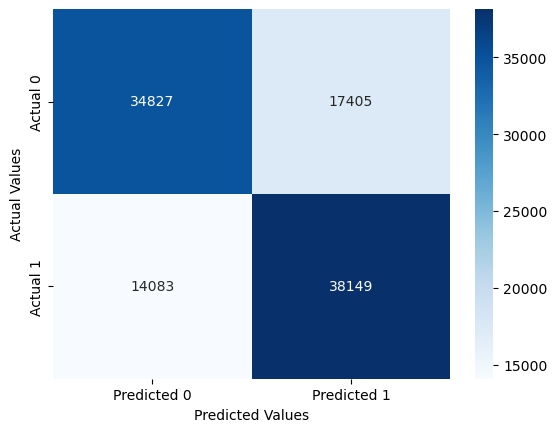

In [ ]:
confusion_matrix_data(test_dummy[preds], test_dummy.readmitted,log,cutoff=0.5)

Classification accuracy = 64.5% <br>
Precision = 11.3% <br>
TPR or Recall = 41.6% <br>
FNR = 58.4% <br>
FPR = 33.1% <br>
ROC-AUC = 54.3% <br>
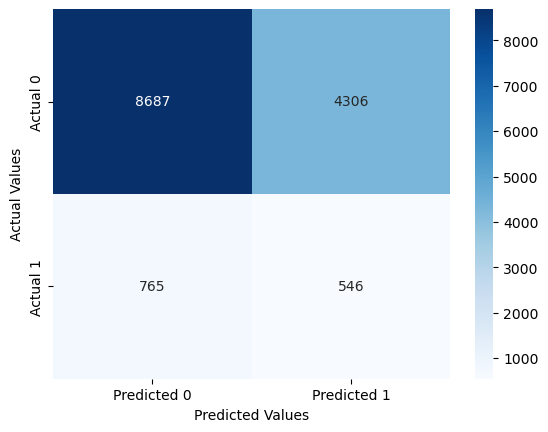

In [ ]:
# adding in variable interactions
from patsy import dmatrices

# creating the formula
f = 'num_lab_procedures'
for i in sig_preds[1:]:
    f = f + '+' + i
    
# adding interations on to the formula
f1 = f+'+change*diabetesMed+(age5+age15+age25+age35+age45+age55+age65+age75+age85+age95)*(time_in_hospital1+time_in_hospital2+time_in_hospital3+time_in_hospital4+time_in_hospital5+time_in_hospital6+time_in_hospital7+time_in_hospital8+time_in_hospital9+time_in_hospital10+time_in_hospital11+time_in_hospital12+time_in_hospital13+time_in_hospital14)+(age5+age15+age25+age35+age45+age55+age65+age75+age85+age95)*number_inpatient+change*(admission_type_id1+admission_type_id3+admission_type_id4+admission_type_id5)'

# creating features for sklearn w/ interactions using patsy
# test data
y0,X0 = dmatrices("readmitted~"+f1, train1_dummy)

# same thing here for train data
y1,X1 =  dmatrices("readmitted~"+f1, test_dummy)

# fit the logistic model
log.fit(X0,y0)

# get the name of the predictors
coef_names = X0.design_info.column_names

# get the list of coeffceints
coefs0 = log.coef_

# find the list of the predictors bwhose coefficient is non zero
sig_preds0 = np.array(coef_names)[np.where(coefs0 != 0)[1]]

In [ ]:
# Test Data Metrics
confusion_matrix_data(np.asarray(X0), train1_dummy.readmitted, log, cutoff=0.5)

Classification accuracy = 69.9% <br>
Precision = 68.7% <br>
TPR or Recall = 73.2% <br>
FNR = 26.8% <br>
FPR = 33.4% <br>
ROC-AUC = 69.9% <br>
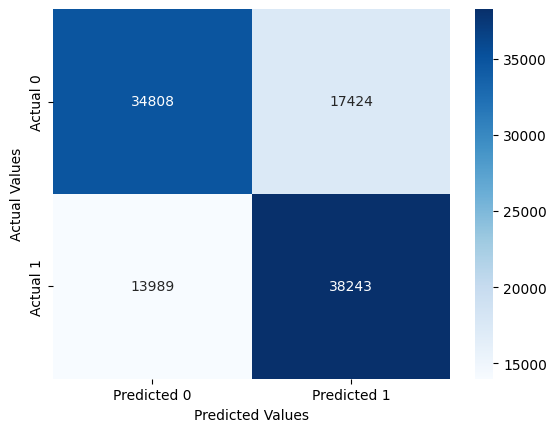

In [ ]:
# Test Data Accuracy
confusion_matrix_data(np.asarray(X1), test_dummy.readmitted, log, cutoff=0.5)

Classification accuracy = 64.6% <br>
Precision = 11.3% <br>
TPR or Recall = 41.8% <br>
FNR = 58.2% <br>
FPR = 33.1% <br>
ROC-AUC = 54.4% <br>
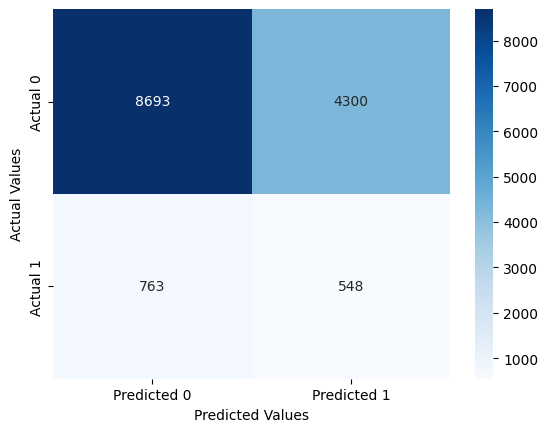

### Code fitting the final model

**NOTE:** Ultimately, after comparing the performance metrics of all the models we created and optimized, the **base model trained with SMOTENC data** had the best training and test performance based on the metrics we needed to optimize: (1) FNR, (2) recall, and (3) precision. 

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [ ]:
# Final modeling 
final_model = sm.logit(formula = 'readmitted ~ time_in_hospital*age + num_of_changes + number_inpatient', data = train1).fit() #Developing logistic regression model
final_model .summary() 

## Conclusions and Recommendations to stakeholder(s)
*By Lila Wells*

Calculating odds ratios

In [ ]:
# Calculating the odds ratios for number_inpatient
odds_ratio = np.exp(final_model.params["number_inpatient"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission increase by', round(pct_increase, 2), '% with each additional inpatient hospital visit')


In [ ]:
# Calculating the odds ratios for num_of_changes
odds_ratio = np.exp(final_model.params["num_of_changes"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission decrease by', round(abs(pct_increase), 2), '% with each additional medication change')


In [ ]:
# Calculating the odds ratios for num_of_changes
odds_ratio = np.exp(final_model.params["age"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission increase by', round(pct_increase, 2), '% with each additional added decade in patient age')


In [ ]:
# Calculating the odds ratios for time_in_hospital
odds_ratio = np.exp(final_model.params["time_in_hospital"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission increases by', round(pct_increase, 2), '% with each additional day spent in the hospital during the patients initial hospital stay')


In [ ]:
# Calculating the odds ratios for time_in_hospital:age
odds_ratio = np.exp(final_model.params["time_in_hospital:age"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission decreases by', round(abs(pct_increase), 2), '% (for interaction term between patient age and time spent in hospital)')
